In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROC = Path("../data/processed") # where we'll save outputs
OUT_DIR = Path("../data/outputs")

proc_path = PROC / "merged_df_clean.csv"

## Basic Data Cleaning

Load the processed dataset and reorder the columns, keeping only what is necessary.

In [22]:
df = pd.read_csv(proc_path)

df = df[['index', 'weekid', 'week position', 'song', 'performer', 'genre',
         'duration', 'danceability', 'energy', 'loudness',
         'mode', 'speechiness', 'acousticness', 'instrumentalness',
         'valence', 'tempo', 'year', 'decade']]

df.head(3)

,index,weekid,week position,song,performer,genre,duration,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,year,decade
0,964,1958-08-02,2,Patricia,Perez Prado And His Orchestra,"['mambo', 'space age pop']",2.33,0.699,0.715,-5.976,1.0,0.0391,0.180,0.415000,0.810,137.373,1958,1950
1,980,1958-08-02,3,Splish Splash,Bobby Darin,"['adult standards', 'brill building pop', 'eas...",2.20,0.645,0.943,-1.526,1.0,0.0393,0.385,0.000000,0.965,147.768,1958,1950
2,292513,1958-08-02,7,Yakety Yak,The Coasters,"['brill building pop', 'bubblegum pop', 'doo-w...",1.88,0.715,0.669,-9.491,1.0,0.1280,0.705,0.000732,0.976,120.789,1958,1950


## Data Visualization

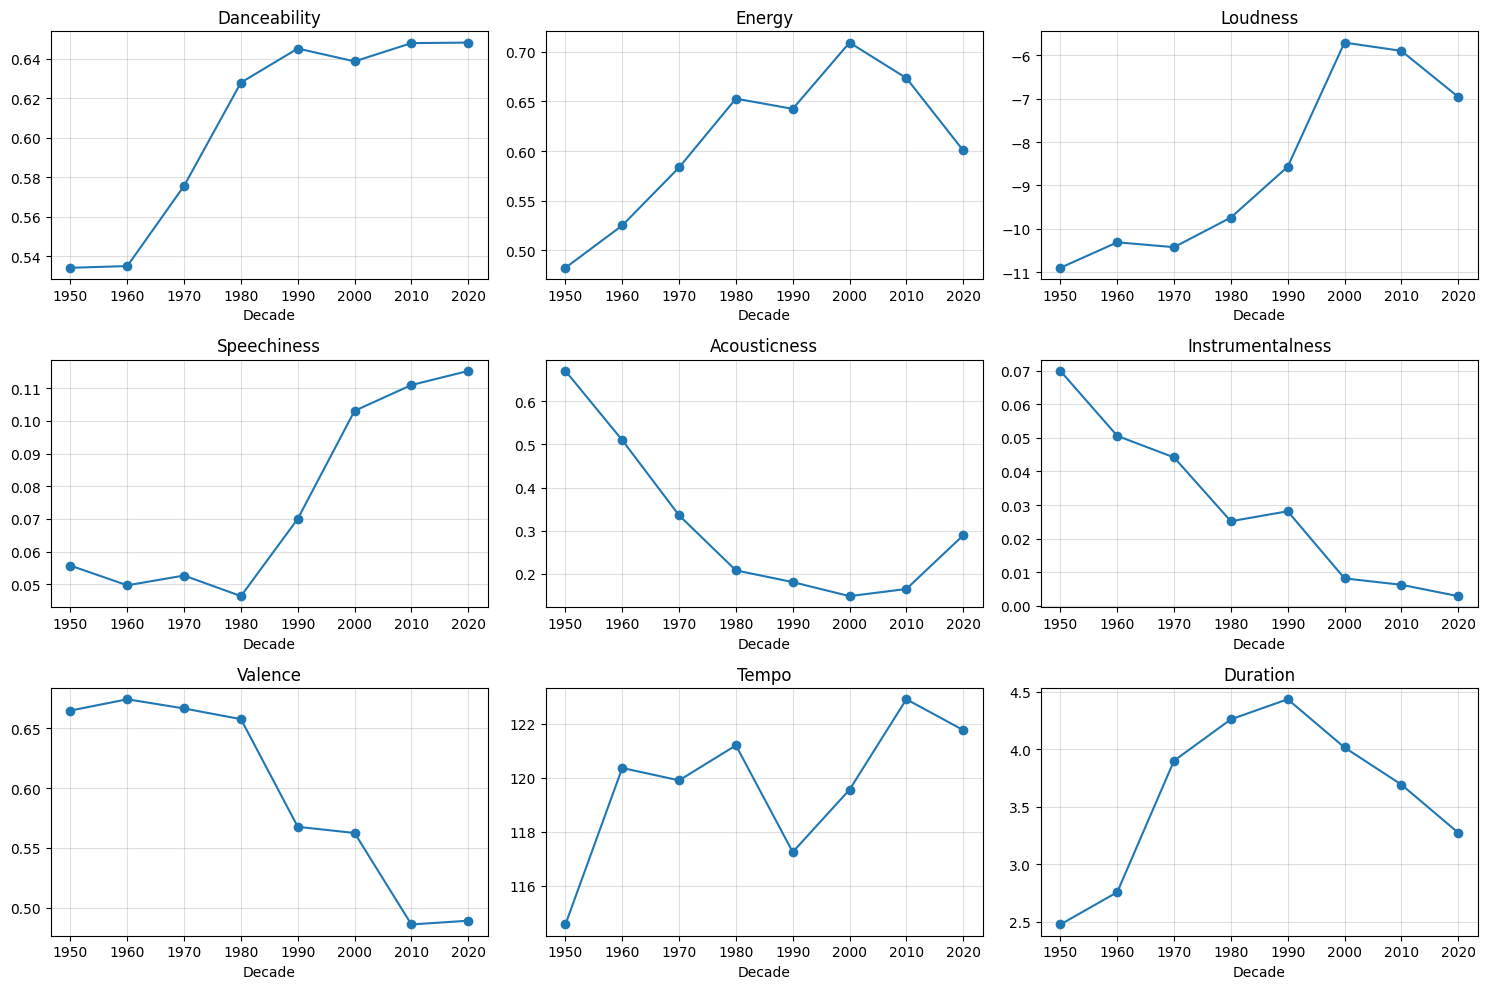

In [24]:
# Select audio features that exist
audio_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration"
]
audio_cols = [c for c in audio_cols if c in df.columns]

# Average by decade
decade_audio = (
    df.groupby("decade")[audio_cols]
      .mean()
      .reset_index()
      .sort_values("decade")
)

# Plot all features in 3x4 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(audio_cols):
    axes[i].plot(decade_audio['decade'], decade_audio[feature], marker='o')
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel("Decade")
    axes[i].grid(True, alpha=0.4)
    
plt.tight_layout()
plt.show()


**Observation:** Danceability and energy both rise significantly from the 1970s onward, suggesting that modern hits have become increasingly upbeat and rhythm-driven. Loudness follows a similar trajectory, consistent with the “loudness wars” and the shift toward more compressed, high-volume production styles starting in the 1990s. Meanwhile, acousticness and instrumentalness decline steadily, highlighting a transition from organic, acoustic compositions to digitally produced and vocal-heavy tracks (thanks to technology). Speechiness climbs sharply in recent decades, reflecting the mainstream integration of rap and spoken-word elements. Valence (musical positivity) trends slightly downward since the 2000s, hinting that recent pop music may lean toward more emotionally complex or introspective tones. Tempo and liveness fluctuate across decades but remain relatively stable overall.


In [ ]:
sns.lineplot(data=df, x='decade', y='energy', hue='genre')